# CHAPTER 21: Convergence Analysis III: Stochastic Proximal Algorithms

### This code runs simulations for Example 2 and generates figure 1 from Chapter 21: Convergence Analysis III: Stochastic Proximal Algorithms (vol I)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Semanur Avşar 

Required Libraries:

1. numpy
2. matplotlib

In [62]:
import numpy as np
import matplotlib.pyplot as plt

## *Example 21.3 $\ell_1-$regularized MSE risk*

We illustrate the behavior of the stochastic proximal algorithm by reconsidering the same setting from Example $20.2$ where we illustrated the behavior of the stochastic subgradient algorithm with and without smoothing. 
 
We consider the same $\ell_1-$regularized MSE risk minimization problem:

$$ 
w^o \triangleq \underset{w}{\text{argmin}}\, \left\{ P(w) \triangleq \alpha\|w\|_1 + \mathbb{E}(\gamma - \mathbf{h}^T \mathbf{w})^2 \right\} \tag{21.35}
$$

where the streaming data samples $(\boldsymbol{\gamma}(n),\mathbf{h}_n)$ are assumed to arise from the linear model:

$$
\boldsymbol{\gamma}(n) = \mathbf{h}_n^T \mathbf{w}^{\bullet} + v(n) \tag{21.36}
$$

for some parameter $w^{\bullet}\in\mathbb{R}^{M}$ and where $\mathbf{v}(n)$ is white noise with zero mean and variance $\sigma_v^2$; the noise is independent of all other random variables. We assume that the data $(\boldsymbol{\gamma},\mathbf{h})$ have zero means with second-order moments given by 

$$
\sigma_{\gamma}^2 \triangleq \mathbb{E}[\boldsymbol{\gamma}^2], \quad r_{h\gamma} \triangleq \mathbb{E}[\mathbf{h}\boldsymbol{\gamma}], \quad R_h \triangleq \mathbb{E}[\mathbf{h}\mathbf{h}^T] = \sigma_h^2 \mathbf{I}_M \tag{21.37}
$$

We already know from ($20.81$) and ($20.82$) that 

$$
\begin{align*}
P(w) &= \alpha\|w\|_1 + \sigma_h^2 \|w - w^{\bullet}\|^2 + \sigma_v^2 \tag{21.38a} \\
w^o &= \mathcal{T}_{\frac{\alpha}{2\sigma_h^2}}(w^{\bullet}) \tag{21.38b}
\end{align*}
$$

We simulate the following scenario. We set $M=25$, $\alpha=0.002,$ $\mu=0.001$, $\sigma_v^2=0.01$, $\sigma_h^2=1$, and $\kappa=0.9980$ for subgradient smoothing. The entries of $\mathbf{h}$ and $\mathbf{v}$ are Gaussian distributed with zero mean. We generate a random sparse model $w^{\bullet}$ with only two nonzero entries set equal to 1, while all other entries are set to $0$. For each run of the algorithms listed below, we generate $N=10,000$ data realizations $\{\gamma(m),h_m\}$. We run the stochastic subgradient algorithm with and without exponential smoothing, namely, 

$$
w_n = w_{n-1} + 2\mu h_n(\gamma(n) - h_n^T w_{n-1}) - \mu\,\alpha\,\text{sign}(w_{n-1}) \tag{21.39}
$$

and 

$$
\begin{cases}
w_n = w_{n-1} + 2\mu h_n(\gamma(n) - h_n^T w_{n-1}) - \mu\,\alpha\,\text{sign}(w_{n-1}) \\
S_{n+1} = \kappa S_n + 1 \\
\bar{w}_{n+1} = \left(1 - \frac{1}{S_{n+1}}\right)\bar{w}_{n} + \frac{1}{S_{n+1}}w_n
\end{cases}
\tag{21.40}
$$

We also run the stochastic proximal gradient algorithm:

$$
\begin{cases}
z_n = w_{n-1} + 2\mu h_n(\gamma(n) - h_n^T w_{n-1}) \\
w_n = \text{prox}_{\mu \alpha \|w\|_1}(z_n) = \mathcal{T}_{\mu\alpha}(z_n)
\end{cases}
\tag{21.41}
$$

For each run, we use expression ($20.38a$) to evaluate the excess-risk curve:

$$
P(w) - P(w^{o}) = \alpha\left(\|w\|_1 - \|w^{o}\|_1\right) + \sigma_h^2 \|w - w^{\bullet}\|^2 - \sigma_h^2 \|\widetilde{w}^{\bullet}\|^2 \tag{21.42}
$$

and average the curves over 50 experiments. The results are shown in Fig. $21.1$ using the logarithmic  scale; each curve is showing the evolution of $10\log_{10}(P(w_n)-P(w^{o}))$ (normalized to start from $0$ dB). It is observed that the stochastic subgradient and proximal algorithms have similar performance, while smoothing enhances steady-state performance. 

In a second simulation, we vary the step size in the range $10^{-4}\leq\mu\leq 10^{-3}$ and assess the steady-state excess risk for the three algorithms; the steady-state values are obtained by averaging the last 50 samples of each excess-risk curve.  The results are plotted in Fig. $21.2$. It is again observed that the stochastic subgradient and proximal algorithms have similar performance, while smoothing enhances performance. 

In [67]:
#################################################################################
# Runs EXAMPLE 3 (ell_1 regularized mean-square-error risk)
# generates figures 2 and 3
#################################################################################

N_Data = 100000 # number of data points
N_Exp = 50      # number of experiments
mu = 0.0001     # step-size
alpha = 0.002  # regularization fator

mu_max = 0.001
mu_min = 0.0001
Delta = (mu_max-mu_min)/10
mu_vec = np.arange(mu_min, Delta+ mu_max, Delta) # step-sizes
J = max(mu_vec.shape)

M = 25         # size of parameter vector
NNZ = 2        # number of nonzero entries (sparsity)

w_0 = np.zeros(M).reshape(-1,1)
w_0[np.random.randint(0, M, size=NNZ)] = 1 # sparse vector used to generate data  
w_star = np.maximum(0,w_0 - alpha)  # minimizer

sigma_n = 0.1   # noise standard deviation
sigma_u = 1     # feature vector sandard deviation
kappa = 0.9980  # smoothing factor
  
Pl = np.zeros(J).reshape(-1,1) # steady-state excess risk for each mu
Ps = np.zeros(J).reshape(-1,1)
Pa = np.zeros(J).reshape(-1,1)

for jx in range(J):
    mu = mu_vec[jx]
    print(jx, mu)

    avgER_l = np.zeros(N_Data).reshape(-1,1)  # Averaged learning curve for proximal implementation
    avgER_s = np.zeros(N_Data).reshape(-1,1)  # Averaged learning curve for subgradient implementation
    avgER_a = np.zeros(N_Data).reshape(-1,1)  # Averaged learning curve for subgradient with smoothing

    for j in range(N_Exp):
        u = sigma_u * np.random.randn(N_Data, M)
        d = np.dot(u, w_0) + sigma_n * np.random.randn(N_Data).reshape(-1,1)

        w_l = np.zeros((M, N_Data))  # Iterate by proximal
        w_s = np.zeros((M, N_Data))  # Iterate by subgradient
        w_a = w_l.copy()  # Iterate by subgradient with smoothing

        ER_l = np.zeros(N_Data).reshape(-1,1)  # Learning curve for proximal
        ER_s = np.zeros(N_Data).reshape(-1,1)  # Learning curve for subgradient
        ER_a = np.zeros(N_Data).reshape(-1,1)  # Learning curve for subgradient with smoothing
        S_L = 0
        
        for n in range(1, N_Data):
            z = w_l[:, n - 1] + 2 * mu * u[n, :] * (d[n] - np.dot(u[n, :], w_l[:, n - 1].reshape(-1,1)))  # Proximal
            w_l[:, n] = np.sign(z) * (np.maximum(0, np.abs(z) - mu * alpha))

            w_s[:, n] = w_s[:, n - 1] + 2 * mu * u[n, :] *(d[n] - np.dot(u[n, :], w_s[:, n - 1].reshape(-1,1))) - mu * alpha * np.sign(
                w_s[:, n - 1])  # Subgradient
            S_L = kappa * S_L + 1
            w_a[:, n] = w_s[:, n] / S_L + (1 - 1 / S_L) * w_a[:, n - 1]  # Subgradient with smoothing

            ER_l[n] = sigma_u ** 2 * np.dot((w_l[:, n].reshape(-1,1) - w_0).T, (w_l[:, n].reshape(-1,1) - w_0)) + alpha * np.linalg.norm(w_l[:, n], 1) - alpha * np.linalg.norm(
                w_star, 1) - sigma_u ** 2 * np.dot((w_0 - w_star).T, (w_0 - w_star))
            ER_s[n] = sigma_u ** 2 * np.dot((w_s[:, n].reshape(-1,1) - w_0).T, (w_s[:, n].reshape(-1,1) - w_0)) + alpha * np.linalg.norm(w_s[:, n], 1) - alpha * np.linalg.norm(
                w_star, 1) - sigma_u ** 2 * np.dot((w_0 - w_star).T, (w_0 - w_star))
            ER_a[n] = sigma_u ** 2 * np.dot((w_a[:, n].reshape(-1,1) - w_0).T, (w_a[:, n].reshape(-1,1) - w_0)) + alpha * np.linalg.norm(w_a[:, n], 1) - alpha * np.linalg.norm(
                w_star, 1) - sigma_u ** 2 * np.dot((w_0 - w_star).T, (w_0 - w_star))

        avgER_l += ER_l
        avgER_s += ER_s
        avgER_a += ER_a

    avgER_lx = avgER_l / N_Exp
    avgER_sx = avgER_s / N_Exp
    avgER_ax = avgER_a / N_Exp
    
    Pl[jx] = np.mean(avgER_lx[-50:]) # average last 50 values
    Ps[jx] = np.mean(avgER_sx[-50:]) # average last 50 values
    Pa[jx] = np.mean(avgER_ax[-50:]) # average last 50 values

0 0.0001
1 0.00019
2 0.00028000000000000003
3 0.00037
4 0.00046
5 0.00055
6 0.00064
7 0.0007300000000000001
8 0.0008200000000000001
9 0.0009100000000000001
10 0.001
11 0.00109


C:\Users\seman\AppData\Local\Temp\ipykernel_24112\1067566905.py:1: RuntimeWarning: divide by zero encountered in log10
  avgER_l = 10 * np.log10(avgER_lx / max(avgER_lx))
C:\Users\seman\AppData\Local\Temp\ipykernel_24112\1067566905.py:2: RuntimeWarning: divide by zero encountered in log10
  avgER_s = 10 * np.log10(avgER_sx / max(avgER_sx))
C:\Users\seman\AppData\Local\Temp\ipykernel_24112\1067566905.py:3: RuntimeWarning: divide by zero encountered in log10
  avgER_a = 10 * np.log10(avgER_ax / max(avgER_ax))


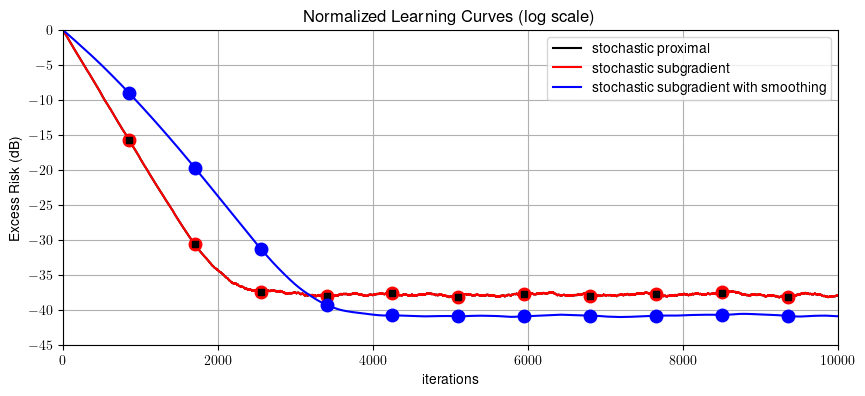

In [68]:
avgER_l = 10 * np.log10(avgER_lx / max(avgER_lx))
avgER_s = 10 * np.log10(avgER_sx / max(avgER_sx))
avgER_a = 10 * np.log10(avgER_ax / max(avgER_ax))

# Plot the normalized learning curves
plt.rcParams.update({
"text.usetex": True,
"font.family": "sans-serif",
"font.sans-serif": "Helvetica",
})        
plt.figure(figsize=(10, 9))
plt.subplot(211)
plt.plot(range(1, N_Data + 1), avgER_l, 'k', linewidth=1.5, label='stochastic proximal')
plt.plot(range(1, N_Data + 1), avgER_s, 'r', linewidth=1.5, label='stochastic subgradient')
plt.plot(range(1, N_Data + 1), avgER_a, 'b', linewidth=1.5, label='stochastic subgradient with smoothing')
plt.plot(range(1, N_Data + 1, 850), avgER_s[0::850], 'ro', markersize=9, markerfacecolor='r')
plt.plot(range(1, N_Data + 1, 850), avgER_l[0::850], 'ks', markersize=5, markerfacecolor='k')
plt.plot(range(1, N_Data + 1, 850), avgER_a[0::850], 'bo', markersize=9, markerfacecolor='b')
plt.legend()
plt.axis([0, 10000, -45, 0])
plt.xlabel('iterations')
plt.ylabel('Excess Risk (dB)')
plt.title('Normalized Learning Curves (log scale)')
plt.grid()
plt.savefig('fig1-ch21.pdf', format='pdf')
plt.show()

**Figure $21.1$** Learning curves in logarithmic scale for the  stochastic subgradient algorithms ($20.86$)--($20.87$) with and without smoothing and for the stochastic proximal gradient algorithm ($21.41$).

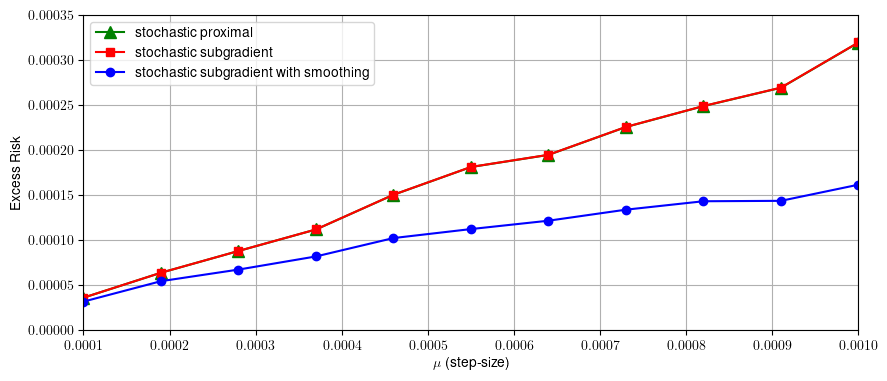

In [69]:
#figure 2 (excess risk)
plt.figure(figsize=(10, 9))
plt.subplot(211)
plt.plot(mu_vec,Pl,'-g^', markersize=9, label='stochastic proximal')
plt.plot(mu_vec,Ps,'-rs', label='stochastic subgradient')
plt.plot(mu_vec,Pa,'-bo', label='stochastic subgradient with smoothing')
plt.xlabel('$\mu$ (step-size)')
plt.ylabel('Excess Risk')
plt.grid()
plt.legend()
plt.axis([0.0001, 0.001, 0, 0.00035])
plt.savefig('fig2-ch21.pdf', format='pdf')
plt.show()

**Figure $21.2$** Excess risk values as function of the step size $\mu$ for the  stochastic subgradient algorithms ($20.86$)--($20.87$) with and without smoothing and for the stochastic proximal gradient algorithm ($21.41$).